# Loan Prediction using Machine Learning 

### Pre-Processing

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.cluster import KMeans
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
import scipy.cluster.hierarchy as sch
from sklearn import metrics
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

In [2]:
#Load the data
data=pd.read_csv("train.csv")
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [4]:
# Finding number of null values
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

#### Imputing null values with mode for categorical variables, mean for continuous variables

In [5]:
data['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [6]:
data.Gender= data.Gender.fillna(data['Gender'].value_counts().index[0])

In [7]:
data['Married'].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [8]:
data.Married= data.Married.fillna(data['Married'].value_counts().index[0])

In [9]:
data['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [10]:
data.Dependents= data.Dependents.fillna(data['Dependents'].value_counts().index[0])

In [11]:
data['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [12]:
data.Self_Employed= data.Self_Employed.fillna(data['Self_Employed'].value_counts().index[0])

In [13]:
data.LoanAmount = data.LoanAmount.fillna(data.LoanAmount.mean())

In [14]:
data['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [15]:
data.Loan_Amount_Term= data.Loan_Amount_Term.fillna(data['Loan_Amount_Term'].value_counts().index[0])

In [16]:
data['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [17]:
data.Credit_History= data.Credit_History.fillna(data['Credit_History'].value_counts().index[0])

In [18]:
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [19]:
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.000000,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.000000,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.000000,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.000000,360.0,1.0,Urban,Y


### Exploratory Data Analysis(EDA)

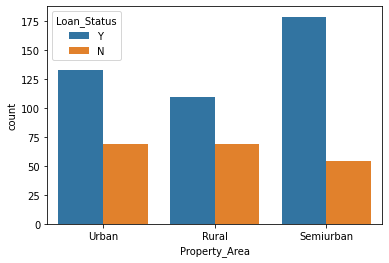

In [20]:
sns.countplot(x='Property_Area',data=data,hue='Loan_Status')

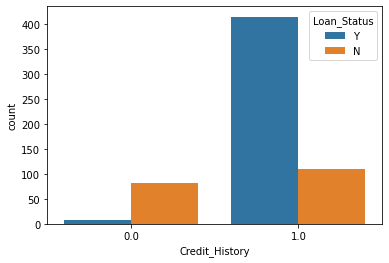

In [21]:
sns.countplot(x='Credit_History',data=data,hue='Loan_Status')

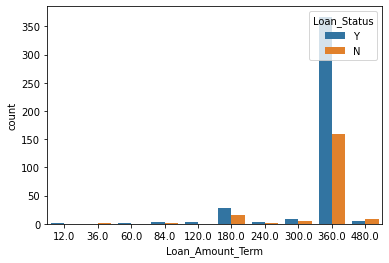

In [22]:
sns.countplot(x='Loan_Amount_Term',data=data,hue='Loan_Status')

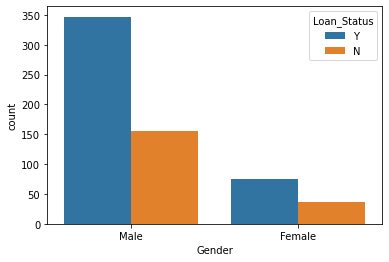

In [23]:
sns.countplot(x='Gender',data=data,hue='Loan_Status')

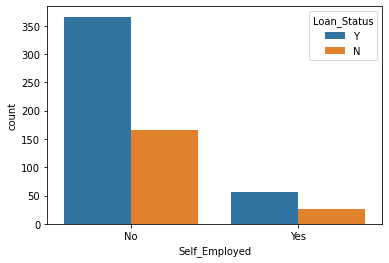

In [24]:
sns.countplot(x='Self_Employed',data=data,hue='Loan_Status')

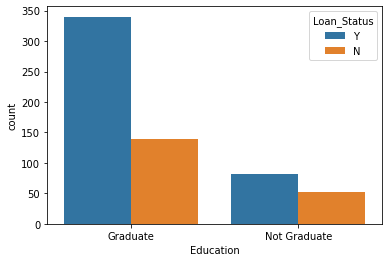

In [25]:
sns.countplot(x='Education',data=data,hue='Loan_Status')

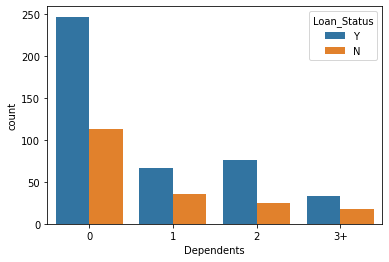

In [26]:
sns.countplot(x='Dependents',data=data,hue='Loan_Status')

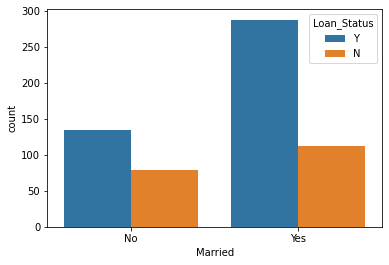

In [27]:
sns.countplot(x='Married',data=data,hue='Loan_Status')

In [28]:
# Converting all categorical values to numeric values.
l=LabelEncoder()
data.Gender=l.fit_transform(data.Gender)
data.Married=l.fit_transform(data.Married)
data.Dependents=l.fit_transform(data.Dependents)
data.Education=l.fit_transform(data.Education)
data.Self_Employed=l.fit_transform(data.Self_Employed)
data.Property_Area=l.fit_transform(data.Property_Area)
data.Loan_Status=l.fit_transform(data.Loan_Status)

In [29]:
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,LP001003,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,LP001005,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,LP001006,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,LP001008,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,0,0,0,0,2900,0.0,71.000000,360.0,1.0,0,1
610,LP002979,1,1,3,0,0,4106,0.0,40.000000,180.0,1.0,0,1
611,LP002983,1,1,1,0,0,8072,240.0,253.000000,360.0,1.0,2,1
612,LP002984,1,1,2,0,0,7583,0.0,187.000000,360.0,1.0,2,1


In [30]:
#Dropping loan id column.
data=data.drop(['Loan_ID'],axis=1)

In [31]:
data

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.000000,360.0,1.0,0,1
610,1,1,3,0,0,4106,0.0,40.000000,180.0,1.0,0,1
611,1,1,1,0,0,8072,240.0,253.000000,360.0,1.0,2,1
612,1,1,2,0,0,7583,0.0,187.000000,360.0,1.0,2,1


In [32]:
# Splitting data into Train and Test Set
X=data.iloc[:,0:10]
y=data.iloc[:,11]

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [34]:
#Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [35]:
#Correlation
corr=data.corr()
corr

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,0.364569,0.172914,0.045364,-0.000525,0.058809,0.082912,0.107930,-0.074030,0.009170,-0.025752,0.017987
Married,0.364569,1.000000,0.334216,0.012304,0.004489,0.051708,0.075948,0.147141,-0.100912,0.010938,0.004257,0.091478
Dependents,0.172914,0.334216,1.000000,0.055752,0.056798,0.118202,0.030430,0.163106,-0.103864,-0.040160,-0.000244,0.010118
Education,0.045364,0.012304,0.055752,1.000000,-0.010383,-0.140760,-0.062290,-0.166998,-0.073928,-0.073658,-0.065243,-0.085884
Self_Employed,-0.000525,0.004489,0.056798,-0.010383,1.000000,0.127180,-0.016100,0.115260,-0.033739,-0.001550,-0.030860,-0.003700
ApplicantIncome,0.058809,0.051708,0.118202,-0.140760,0.127180,1.000000,-0.116605,0.565620,-0.046531,-0.018615,-0.009500,-0.004710
CoapplicantIncome,0.082912,0.075948,0.030430,-0.062290,-0.016100,-0.116605,1.000000,0.187828,-0.059383,0.011134,0.010522,-0.059187
LoanAmount,0.107930,0.147141,0.163106,-0.166998,0.115260,0.565620,0.187828,1.000000,0.036475,-0.001431,-0.044776,-0.036416
Loan_Amount_Term,-0.074030,-0.100912,-0.103864,-0.073928,-0.033739,-0.046531,-0.059383,0.036475,1.000000,-0.004705,-0.076120,-0.022549
Credit_History,0.009170,0.010938,-0.040160,-0.073658,-0.001550,-0.018615,0.011134,-0.001431,-0.004705,1.000000,0.001963,0.540556


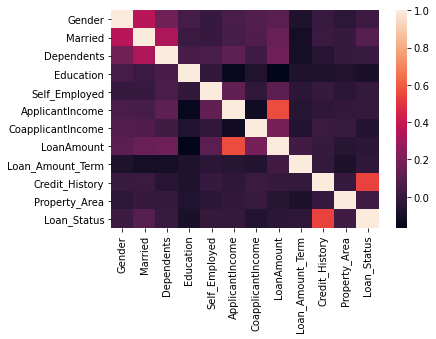

In [36]:
import seaborn as sns
sns.heatmap(corr,xticklabels=corr.columns, yticklabels=corr.columns)

## Machine Learning Algorithms

### Linear Regression

In [37]:
linreg = LinearRegression().fit(X_train, y_train)
def get_cv_scores(model):
    scores = cross_val_score(model,
                             X_train,
                             y_train,
                             cv=10,
                             scoring='r2')
    
    print('CV Mean: ', np.mean(scores))
    print('STD: ', np.std(scores))
    print('\n')
get_cv_scores(linreg)

CV Mean:  0.25109356404173494
STD:  0.2004633006725323




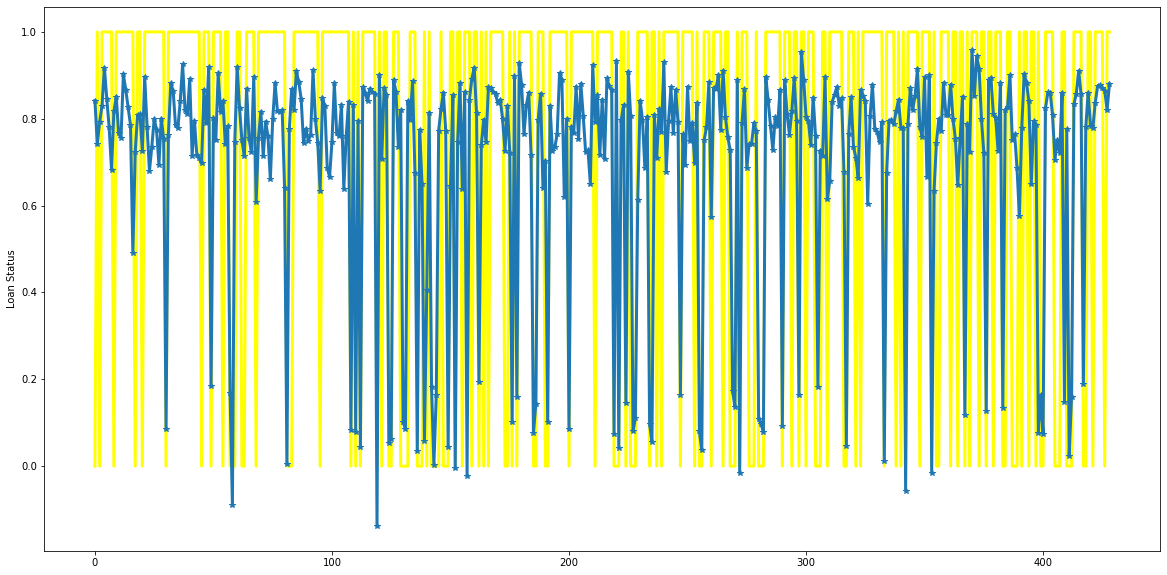

In [38]:
#for training data
plt.figure(figsize=(20, 10))
plt.plot(range(0, len(y_train)), y_train, color='yellow', linewidth=3)
plt.plot(range(0, len(y_train)), linreg.predict(X_train), marker="*", linewidth=3)
plt.ylabel("Loan Status")
plt.show()

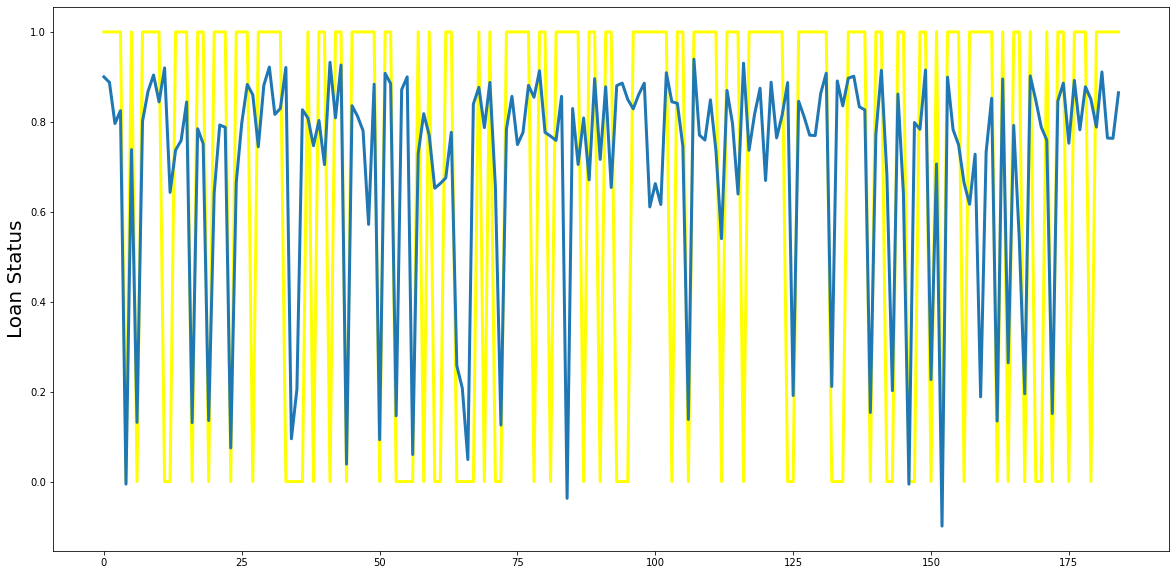

In [39]:
# For testing data
plt.figure(figsize=(20, 10))
plt.plot(range(0, len(y_test)), y_test, color='yellow', linewidth=3)
plt.plot(range(0, len(y_test)), linreg.predict(X_test), linewidth=3)
plt.ylabel("Loan Status",fontsize=20)
plt.show()

### Ridge Regression

In [40]:
ridreg = Ridge(alpha=1)
ridreg.fit(X_train, y_train)

Ridge(alpha=1)

In [41]:
y_pred = ridreg.predict(X_test)

In [42]:
print("MSE on train data: ", mean_squared_error(y_true=y_train, y_pred=ridreg.predict(X_train)))
print("MAE on train data: ", mean_absolute_error(y_true=y_train, y_pred=ridreg.predict(X_train)))
print("R squared on train data: ", ridreg.score(X_train, y_train))

print("MSE on test data: ", mean_squared_error(y_true=y_test, y_pred=ridreg.predict(X_test)))
print("MAE on test data: ", mean_absolute_error(y_true=y_test, y_pred=ridreg.predict(X_test)))
print("R squared on test data: ", ridreg.score(X_test, y_test))

MSE on train data:  0.14288667334161959
MAE on train data:  0.2875313008027269
R squared on train data:  0.32346266404772284
MSE on test data:  0.16674712191349159
MAE on test data:  0.31116530224789934
R squared on test data:  0.2516495872686534


### Ridge Hyperparameter Tuning

In [43]:
params = {"alpha": [10,15,20,25,30,35,40,45]}
ridreg = Ridge()
clf = GridSearchCV(estimator=ridreg, param_grid=params, cv=10, return_train_score=True)
clf.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=Ridge(),
             param_grid={'alpha': [10, 15, 20, 25, 30, 35, 40, 45]},
             return_train_score=True)

In [44]:
clf.best_estimator_

Ridge(alpha=20)

In [45]:
ridreg = Ridge(alpha=30)
ridreg.fit(X_train, y_train)

Ridge(alpha=30)

In [46]:
print("MSE on train data: ", mean_squared_error(y_true=y_train, y_pred=ridreg.predict(X_train)))
print("MAE on train data: ", mean_absolute_error(y_true=y_train, y_pred=ridreg.predict(X_train)))
print("R squared on train data: ", ridreg.score(X_train, y_train))

print("MSE on test data: ", mean_squared_error(y_true=y_test, y_pred=ridreg.predict(X_test)))
print("MAE on test data: ", mean_absolute_error(y_true=y_test, y_pred=ridreg.predict(X_test)))
print("R squared on test data: ", ridreg.score(X_test, y_test))

MSE on train data:  0.1431795404957465
MAE on train data:  0.2952491955660811
R squared on train data:  0.3220760017397045
MSE on test data:  0.16619977957078338
MAE on test data:  0.31830325630765516
R squared on test data:  0.2541060246774114


### Decision Tree

In [47]:
clf= DecisionTreeClassifier()
clf.fit(X_train,y_train)

DecisionTreeClassifier()

[Text(85.9716743119266, 212.004, 'X[9] <= -1.038\ngini = 0.422\nsamples = 429\nvalue = [130, 299]'),
 Text(30.71559633027523, 201.132, 'X[6] <= 2.177\ngini = 0.153\nsamples = 60\nvalue = [55, 5]'),
 Text(20.477064220183486, 190.26, 'X[5] <= -0.058\ngini = 0.128\nsamples = 58\nvalue = [54, 4]'),
 Text(12.28623853211009, 179.388, 'X[8] <= -1.511\ngini = 0.05\nsamples = 39\nvalue = [38, 1]'),
 Text(8.190825688073394, 168.516, 'X[5] <= -0.641\ngini = 0.245\nsamples = 7\nvalue = [6, 1]'),
 Text(4.095412844036697, 157.644, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(12.28623853211009, 157.644, 'gini = 0.0\nsamples = 6\nvalue = [6, 0]'),
 Text(16.381651376146788, 168.516, 'gini = 0.0\nsamples = 32\nvalue = [32, 0]'),
 Text(28.66788990825688, 179.388, 'X[5] <= -0.033\ngini = 0.266\nsamples = 19\nvalue = [16, 3]'),
 Text(24.57247706422018, 168.516, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(32.763302752293576, 168.516, 'X[3] <= 0.608\ngini = 0.111\nsamples = 17\nvalue = [16, 1]'),


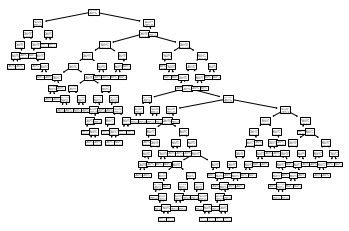

In [48]:
from sklearn import tree
tree.plot_tree(clf) 

In [49]:
y_pred= clf.predict(X_test)

In [50]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.6648648648648648

Text(33.0, 0.5, 'Actual')

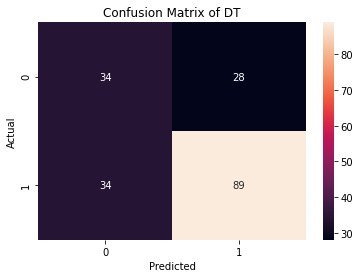

In [51]:
ConfusionMatrix=confusion_matrix(y_test,y_pred)
sns.heatmap(ConfusionMatrix,annot = True, fmt = "d")
plt.title('Confusion Matrix of DT')
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [52]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.50      0.55      0.52        62
           1       0.76      0.72      0.74       123

    accuracy                           0.66       185
   macro avg       0.63      0.64      0.63       185
weighted avg       0.67      0.66      0.67       185



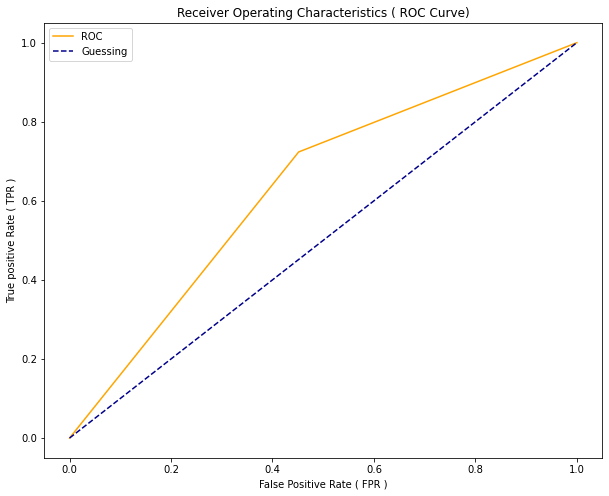

AUC Score : 63.60%


In [53]:
FPR, TPR, Threshold = roc_curve(y_test,y_pred)
AUC = roc_curve(y_test,y_pred)
def Plot_ROC_Curve(FPR,TPR) :
    plt.figure(figsize = (10, 8))
    # Plot ROC Curve
    plt.plot(FPR, TPR, color = 'orange', label = 'ROC')
    # Plot Line with No Predictive Power (Baseline)
    plt.plot([0,1],[0,1], color = 'darkblue', linestyle = '--', label = 'Guessing')
    # Customize the Plot 
    plt.title('Receiver Operating Characteristics ( ROC Curve)')
    plt.xlabel('False Positive Rate ( FPR )')
    plt.ylabel('True positive Rate ( TPR )')
    plt.legend()
    plt.show()
Plot_ROC_Curve(FPR, TPR)
print(f'AUC Score : {roc_auc_score(y_test,y_pred)*100:.2f}%')

In [54]:
param_dist={
      'criterion':['gini', 'entropy'],
    'max_depth':[1,2,3,4,5,6,7,None]
}

In [55]:
grid = GridSearchCV(clf, param_grid=param_dist, cv=10, n_jobs=-1)
grid.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, None]})

In [56]:
grid.best_estimator_

DecisionTreeClassifier(max_depth=1)

In [57]:
grid.best_score_

0.8133997785160574

In [58]:
grid.best_params_

{'criterion': 'gini', 'max_depth': 1}

In [59]:
y_pred = grid.predict(X_test)

In [60]:
accuracy_score(y_test, y_pred)

0.8

In [61]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[ 27  35]
 [  2 121]]


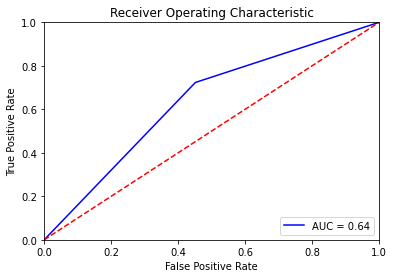

In [62]:
def plot_roc(model, X_test, y_test):
    # calculate the fpr and tpr for all thresholds of the classification
    probabilities = model.predict_proba(np.array(X_test))
    predictions = probabilities[:, 1]
    fpr, tpr, threshold = metrics.roc_curve(y_test, predictions)
    roc_auc = metrics.auc(fpr, tpr)

    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label='AUC = %0.2f' % roc_auc)
    plt.legend(loc='lower right')
    plt.plot([0, 1], [0, 1], 'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
plot_roc(clf,X_test,y_test)

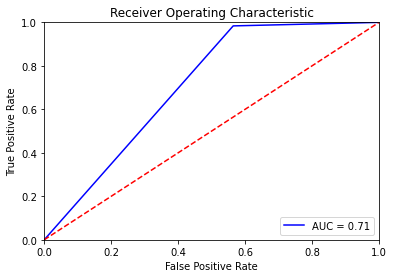

In [63]:
plot_roc(grid,X_test,y_test)

In [64]:
tp=cm[0,0]
fn=cm[0,1]
fp=cm[1,0]
tn=cm[1,1]

In [65]:
recall=(tp/(tp+fn))
print(recall)

0.43548387096774194


In [66]:
precision=(tp/(tp+fp))
print(precision)

0.9310344827586207


In [67]:
f1_score=(2*recall*precision)/(recall+precision)
print(f1_score)

0.5934065934065935


### Logistic Regression

In [68]:
# Fitting Logistic Regression to the Training set
logModel = LogisticRegression()
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [69]:
y_pred = classifier.predict(X_test)
y_pred

array([1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1])

In [70]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[ 27,  35],
       [  2, 121]], dtype=int64)

Text(33.0, 0.5, 'Actual')

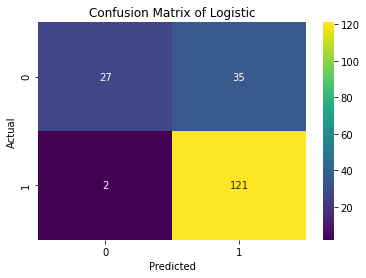

In [71]:
sns.heatmap(cm, annot = True, fmt = "d", cmap = 'viridis')
plt.title('Confusion Matrix of Logistic')
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [72]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.44      0.59        62
           1       0.78      0.98      0.87       123

    accuracy                           0.80       185
   macro avg       0.85      0.71      0.73       185
weighted avg       0.83      0.80      0.78       185



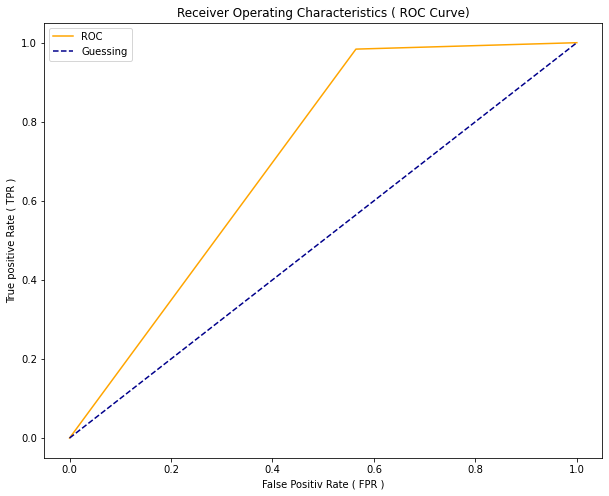

AUC Score : 70.96%


In [73]:
FPR, TPR, Threshold = roc_curve(y_test, y_pred)
AUC = roc_curve(y_test, y_pred)

def Plot_ROC_Curve(FPR, TPR) :
    
    plt.figure(figsize = (10, 8))
    
    # Plot ROC Curve
    plt.plot(FPR, TPR, color = 'orange', label = 'ROC')
    
    # Plot Line with No Predictive Power (Baseline)
    plt.plot([0,1],[0,1], color = 'darkblue', linestyle = '--', label = 'Guessing')
    
    # Customize the Plot 
    plt.title('Receiver Operating Characteristics ( ROC Curve)')
    plt.xlabel('False Positiv Rate ( FPR )')
    plt.ylabel('True positive Rate ( TPR )')
    plt.legend()
    plt.show()

Plot_ROC_Curve(FPR, TPR)
print(f'AUC Score : {roc_auc_score(y_test, y_pred)*100:.2f}%')

In [74]:
print('The accuracy of Logistic Regression is: ', metrics.accuracy_score(y_test, y_pred))

The accuracy of Logistic Regression is:  0.8


### Logistic Hyperparameter Tuning

In [75]:
logreg = LogisticRegression()

In [76]:
penalty = ['l1', 'l2']
C = np.logspace(-4,4,20)

In [77]:
hyperparameters = dict(penalty=penalty, C=C)
clf = GridSearchCV(logreg, hyperparameters, cv=10)
best_clf = clf.fit(X_train,y_train)

C:\Users\sreer\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sreer\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\sreer\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\sreer\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\sreer\anaconda3\lib\site-packages\sklearn\model_selection\_v

C:\Users\sreer\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sreer\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\sreer\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\sreer\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\sreer\anaconda3\lib\site-packages\sklearn\model_selection\_v

In [78]:
best_clf.best_estimator_

LogisticRegression(C=0.012742749857031334)

In [79]:
print (f'Accuracy - :{best_clf.score(X_test,y_test)}')

Accuracy - :0.8


### KNN

In [80]:
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'manhattan', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier(metric='manhattan')

In [81]:
y_pred2 = classifier.predict(X_test)
y_pred2

array([1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1])

In [82]:
print(confusion_matrix(y_test, y_pred2))

[[ 25  37]
 [  4 119]]


In [83]:
ConfusionMatrix = confusion_matrix(y_pred2,y_test)

Text(33.0, 0.5, 'Actual')

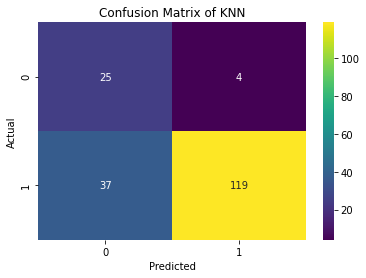

In [84]:
sns.heatmap(ConfusionMatrix, annot = True, fmt = "d", cmap = 'viridis')
plt.title('Confusion Matrix of KNN')
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [85]:
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.86      0.40      0.55        62
           1       0.76      0.97      0.85       123

    accuracy                           0.78       185
   macro avg       0.81      0.69      0.70       185
weighted avg       0.80      0.78      0.75       185



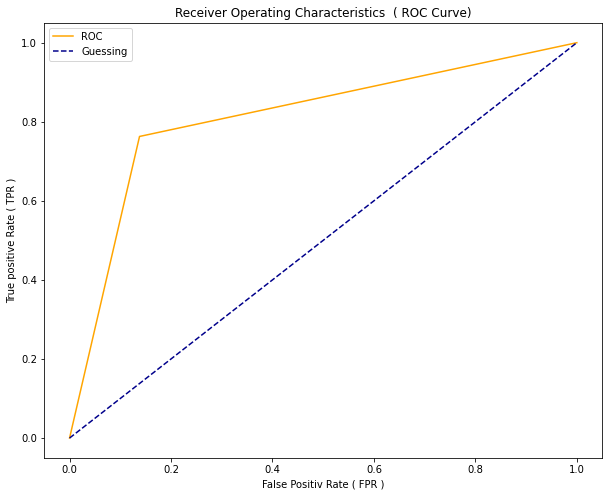

AUC Score : 68.54%


In [86]:
FPR, TPR, Threshold = roc_curve(y_pred2, y_test)
AUC = roc_curve(y_pred, y_test)

def Plot_ROC_Curve(FPR, TPR) :
    
    plt.figure(figsize = (10, 8))
    
    # Plot ROC Curve
    plt.plot(FPR, TPR, color = 'orange', label = 'ROC')
    
    # Plot Line with No Predictive Power (Baseline)
    plt.plot([0,1],[0,1], color = 'darkblue', linestyle = '--', label = 'Guessing')
    
    # Customize the Plot 
    plt.title('Receiver Operating Characteristics  ( ROC Curve)')
    plt.xlabel('False Positiv Rate ( FPR )')
    plt.ylabel('True positive Rate ( TPR )')
    plt.legend()
    plt.show()

Plot_ROC_Curve(FPR, TPR)
print(f'AUC Score : {roc_auc_score(y_test, y_pred2)*100:.2f}%')

In [87]:
print('The accuracy of KNN is: ', metrics.accuracy_score(y_pred2, y_test))

The accuracy of KNN is:  0.7783783783783784


In [88]:
rf_params = {
    'n_neighbors': [2, 3, 5,10,15,20],
}

In [89]:
clf = KNeighborsClassifier()
grid = GridSearchCV(clf, rf_params, cv=3, scoring='accuracy')
grid.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [2, 3, 5, 10, 15, 20]},
             scoring='accuracy')

In [90]:
print(grid.best_params_)

{'n_neighbors': 15}


In [91]:
print("Accuracy:"+ str(grid.best_score_))

Accuracy:0.8088578088578089


### SVM

In [92]:
svc=SVC(kernel='rbf',C=0.1,gamma='auto',random_state = 0)
svc.fit(X_train, y_train)

SVC(C=0.1, gamma='auto', random_state=0)

In [93]:
ypred_svc=svc.predict(X_test)

In [94]:
print(classification_report(y_test, ypred_svc))

              precision    recall  f1-score   support

           0       0.95      0.32      0.48        62
           1       0.74      0.99      0.85       123

    accuracy                           0.77       185
   macro avg       0.85      0.66      0.67       185
weighted avg       0.81      0.77      0.73       185



In [95]:
print('Accuracy:', metrics.accuracy_score(y_test,ypred_svc)*100)

Accuracy: 76.75675675675676


In [96]:
cm=confusion_matrix(y_test, ypred_svc)
cm

array([[ 20,  42],
       [  1, 122]], dtype=int64)

Text(33.0, 0.5, 'Actual')

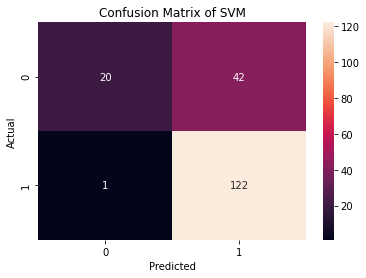

In [97]:
ConfusionMatrix=confusion_matrix(y_test,ypred_svc)
sns.heatmap(ConfusionMatrix,annot = True, fmt = "d")
plt.title('Confusion Matrix of SVM')
plt.xlabel('Predicted')
plt.ylabel('Actual')

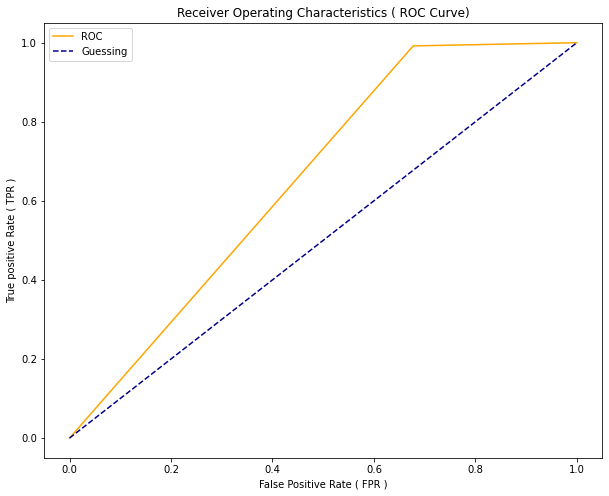

AUC Score : 65.72%


In [98]:
FPR,TPR,Threshold=roc_curve(y_test,ypred_svc)
AUC=roc_curve(y_test,ypred_svc)
def Plot_ROC_Curve(FPR,TPR) :
    plt.figure(figsize = (10, 8))
    # Plot ROC Curve
    plt.plot(FPR, TPR,color ='orange', label = 'ROC')
    # Plot Line with No Predictive Power (Baseline)
    plt.plot([0,1],[0,1], color = 'darkblue', linestyle = '--', label = 'Guessing')
    # Customize the Plot 
    plt.title('Receiver Operating Characteristics ( ROC Curve)')
    plt.xlabel('False Positive Rate ( FPR )')
    plt.ylabel('True positive Rate ( TPR )')
    plt.legend()
    plt.show()
Plot_ROC_Curve(FPR, TPR)
print(f'AUC Score : {roc_auc_score(y_test, ypred_svc)*100:.2f}%')

### SVM Hyperparameter Tuning

In [99]:
# USING GRIDSEARCH
svm=GridSearchCV(svm.SVC(gamma='auto'),{
  'C':[0.1,1,10,20],
 'kernel':['rbf','linear','poly']
},cv=3, return_train_score=False)
svm.fit(X_train,y_train)
svm.cv_results_

{'mean_fit_time': array([0.00233372, 0.00275834, 0.00317001, 0.00523655, 0.00371178,
        0.0036823 , 0.00206288, 0.00860898, 0.00426396, 0.00419346,
        0.01284337, 0.0026505 ]),
 'std_fit_time': array([0.001166  , 0.0021268 , 0.00248278, 0.00069905, 0.00139942,
        0.00145624, 0.00148255, 0.00412396, 0.00310619, 0.00072862,
        0.00607572, 0.00123434]),
 'mean_score_time': array([0.00220791, 0.00185784, 0.00067059, 0.00099794, 0.00083097,
        0.00033236, 0.00271297, 0.00033267, 0.00134857, 0.00132815,
        0.0027252 , 0.00070604]),
 'std_score_time': array([1.66444239e-03, 1.61578390e-03, 4.74231928e-04, 4.89903609e-07,
        7.00277492e-04, 4.70021655e-04, 1.91846589e-03, 4.70471221e-04,
        1.90717299e-03, 1.24033416e-03, 1.92744575e-03, 5.01822208e-04]),
 'param_C': masked_array(data=[0.1, 0.1, 0.1, 1, 1, 1, 10, 10, 10, 20, 20, 20],
              mask=[False, False, False, False, False, False, False, False,
                    False, False, False, False

In [100]:
svm.best_params_

{'C': 0.1, 'kernel': 'linear'}

In [101]:
acc_svm=f'Accuracy: {svm.score(X_test,y_test)*100:.2f}%'

In [102]:
acc_svm

'Accuracy: 80.00%'

In [103]:
ypred_svm=svm.predict(X_test)
ypred_svm

array([1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1])

In [104]:
print(classification_report(y_test,ypred_svm))

              precision    recall  f1-score   support

           0       0.93      0.44      0.59        62
           1       0.78      0.98      0.87       123

    accuracy                           0.80       185
   macro avg       0.85      0.71      0.73       185
weighted avg       0.83      0.80      0.78       185



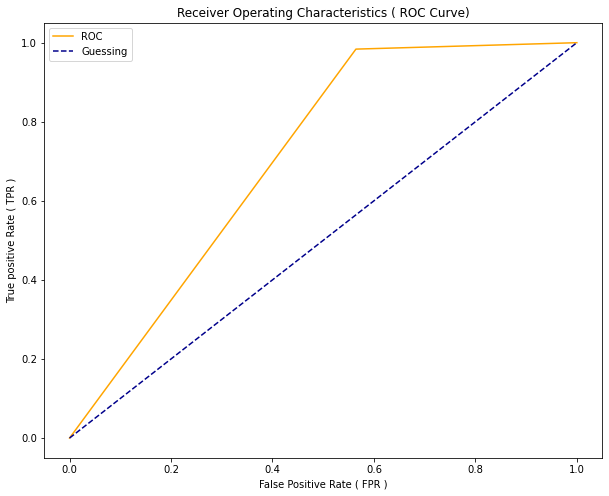

AUC Score : 70.96%


In [105]:
FPR, TPR, Threshold = roc_curve(y_test,ypred_svm)
AUC = roc_curve(y_test,ypred_svm)
def Plot_ROC_Curve(FPR,TPR) :
    plt.figure(figsize = (10, 8))
    # Plot ROC Curve
    plt.plot(FPR, TPR, color = 'orange', label = 'ROC')
    # Plot Line with No Predictive Power (Baseline)
    plt.plot([0,1],[0,1], color = 'darkblue', linestyle = '--', label = 'Guessing')
    # Customize the Plot 
    plt.title('Receiver Operating Characteristics ( ROC Curve)')
    plt.xlabel('False Positive Rate ( FPR )')
    plt.ylabel('True positive Rate ( TPR )')
    plt.legend()
    plt.show()
Plot_ROC_Curve(FPR, TPR)
print(f'AUC Score : {roc_auc_score(y_test,ypred_svm)*100:.2f}%')

### Random Forest

In [106]:
r_f = RandomForestClassifier(n_estimators = 100, criterion = 'entropy',oob_score=True)
r_f.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', oob_score=True)

In [107]:
ypred_r_f=r_f.predict(X_test)
ypred_r_f

array([1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1])

In [108]:
print('Accuracy:', metrics.accuracy_score(y_test,ypred_r_f)*100)

Accuracy: 78.91891891891892


In [109]:
print(confusion_matrix(y_test, ypred_r_f))

[[ 30  32]
 [  7 116]]


Text(33.0, 0.5, 'Actual')

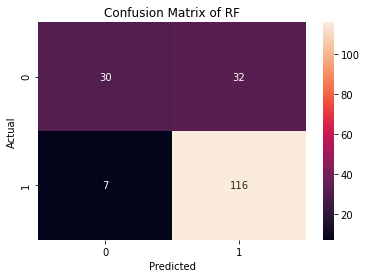

In [110]:
ConfusionMatrix=confusion_matrix(y_test,ypred_r_f)
sns.heatmap(ConfusionMatrix,annot = True, fmt = "d")
plt.title('Confusion Matrix of RF')
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [111]:
print(classification_report(y_test,ypred_r_f))

              precision    recall  f1-score   support

           0       0.81      0.48      0.61        62
           1       0.78      0.94      0.86       123

    accuracy                           0.79       185
   macro avg       0.80      0.71      0.73       185
weighted avg       0.79      0.79      0.77       185



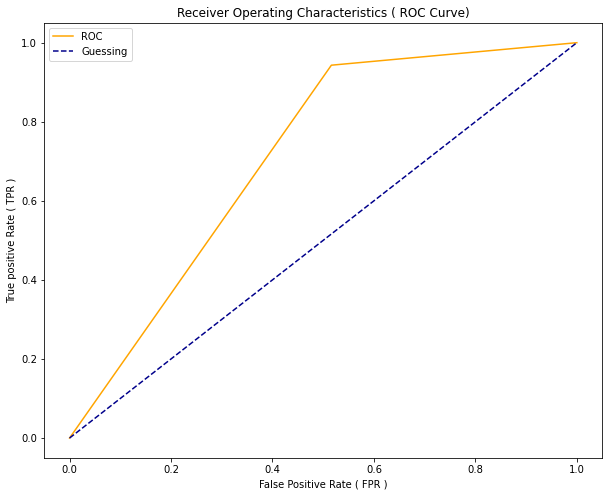

AUC Score : 71.35%


In [112]:
FPR,TPR,Threshold=roc_curve(y_test, ypred_r_f)
AUC=roc_curve(y_test, ypred_r_f)
def Plot_ROC_Curve(FPR, TPR) :
    plt.figure(figsize = (10, 8))
    # Plot ROC Curve
    plt.plot(FPR, TPR, color = 'orange', label = 'ROC')
    # Plot Line with No Predictive Power (Baseline)
    plt.plot([0,1],[0,1], color = 'darkblue', linestyle = '--', label = 'Guessing')
    # Customize the Plot 
    plt.title('Receiver Operating Characteristics ( ROC Curve)')
    plt.xlabel('False Positive Rate ( FPR )')
    plt.ylabel('True positive Rate ( TPR )')
    plt.legend()
    plt.show()

Plot_ROC_Curve(FPR, TPR)
print(f'AUC Score : {roc_auc_score(y_test, ypred_r_f)*100:.2f}%')

In [113]:
feature_imp = pd.Series(r_f.feature_importances_,index=X.columns).sort_values(ascending=False)
feature_imp

ApplicantIncome      0.234346
LoanAmount           0.227185
Credit_History       0.214377
CoapplicantIncome    0.137608
Dependents           0.049081
Loan_Amount_Term     0.043186
Married              0.031540
Education            0.024223
Self_Employed        0.019356
Gender               0.019098
dtype: float64

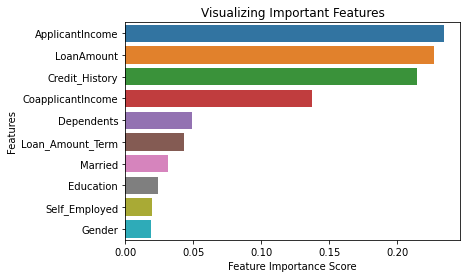

In [114]:
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

In [115]:
print('OOB Score:',(r_f.oob_score_)*100)

OOB Score: 76.92307692307693


### RF Hyperparameter Tuning

In [116]:
n_estimators=[int(x) for x in np.linspace(start=10,stop=120,num=10)]
max_features=['auto','sqrt']
max_depth=[5,6]
min_samples_split=[2,5]
min_samples_leaf=[1,2]
bootstrap=[True,False]

In [117]:
param_grid={'n_estimators':n_estimators, 'max_features':max_features, 'max_depth': max_depth,'min_samples_split':min_samples_split,
           'min_samples_leaf':min_samples_leaf,'bootstrap':bootstrap}
print(param_grid)

{'n_estimators': [10, 22, 34, 46, 58, 71, 83, 95, 107, 120], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 6], 'min_samples_split': [2, 5], 'min_samples_leaf': [1, 2], 'bootstrap': [True, False]}


In [118]:
from sklearn.model_selection import GridSearchCV
rf=GridSearchCV(estimator=RandomForestClassifier(),param_grid=param_grid,cv=3,verbose=2,n_jobs=4)

In [119]:
rf.fit(X_train,y_train)

Fitting 3 folds for each of 320 candidates, totalling 960 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  58 tasks      | elapsed:    3.0s
[Parallel(n_jobs=4)]: Done 300 tasks      | elapsed:   15.9s
[Parallel(n_jobs=4)]: Done 706 tasks      | elapsed:   32.2s
[Parallel(n_jobs=4)]: Done 960 out of 960 | elapsed:   42.4s finished


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=4,
             param_grid={'bootstrap': [True, False], 'max_depth': [5, 6],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [10, 22, 34, 46, 58, 71, 83, 95, 107,
                                          120]},
             verbose=2)

In [120]:
rf.best_params_

{'bootstrap': True,
 'max_depth': 5,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 22}

In [121]:
print(f'Train Accuracy: {rf.score(X_train,y_train)*100:.2f}')
print(f'Test Accuracy: {rf.score(X_test,y_test)*100:.2f}')

Train Accuracy: 82.05
Test Accuracy: 78.92


In [122]:
ypred_rf=rf.predict(X_test)
cm=confusion_matrix(y_test,ypred_rf)
print(cm)

[[ 28  34]
 [  5 118]]


Text(33.0, 0.5, 'Actual')

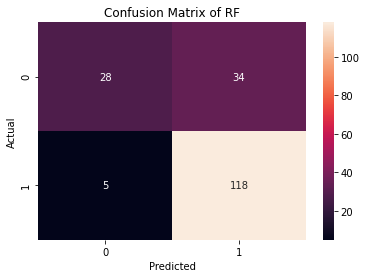

In [123]:
ConfusionMatrix=confusion_matrix(y_test,ypred_rf)
sns.heatmap(ConfusionMatrix,annot = True, fmt = "d")
plt.title('Confusion Matrix of RF')
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [124]:
print(classification_report(y_test,ypred_rf))

              precision    recall  f1-score   support

           0       0.85      0.45      0.59        62
           1       0.78      0.96      0.86       123

    accuracy                           0.79       185
   macro avg       0.81      0.71      0.72       185
weighted avg       0.80      0.79      0.77       185



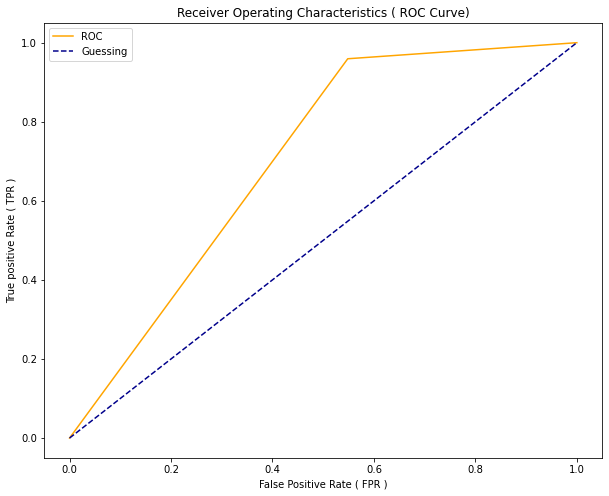

AUC Score : 70.55%


In [125]:
FPR,TPR,Threshold=roc_curve(y_test, ypred_rf)
AUC=roc_curve(y_test, ypred_rf)
def Plot_ROC_Curve(FPR, TPR) :
    plt.figure(figsize = (10, 8))
    # Plot ROC Curve
    plt.plot(FPR, TPR, color = 'orange', label = 'ROC')
    # Plot Line with No Predictive Power (Baseline)
    plt.plot([0,1],[0,1], color = 'darkblue', linestyle = '--', label = 'Guessing')
    # Customize the Plot 
    plt.title('Receiver Operating Characteristics ( ROC Curve)')
    plt.xlabel('False Positive Rate ( FPR )')
    plt.ylabel('True positive Rate ( TPR )')
    plt.legend()
    plt.show()

Plot_ROC_Curve(FPR, TPR)
print(f'AUC Score : {roc_auc_score(y_test, ypred_rf)*100:.2f}%')

## Naive Bayes

In [126]:
nb= GaussianNB(var_smoothing=1)
nb.fit(X_train, y_train)
ypred_n_b=nb.predict(X_test)

In [127]:
print('Accuracy:',metrics.accuracy_score(y_test,ypred_n_b)*100)

Accuracy: 80.0


In [128]:
print(confusion_matrix(y_test, ypred_n_b))

[[ 28  34]
 [  3 120]]


Text(33.0, 0.5, 'Actual')

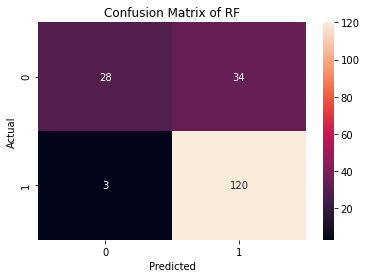

In [129]:
ConfusionMatrix=confusion_matrix(y_test,ypred_n_b)
sns.heatmap(ConfusionMatrix,annot = True, fmt = "d")
plt.title('Confusion Matrix of RF')
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [130]:
print(classification_report(y_test,ypred_n_b))

              precision    recall  f1-score   support

           0       0.90      0.45      0.60        62
           1       0.78      0.98      0.87       123

    accuracy                           0.80       185
   macro avg       0.84      0.71      0.73       185
weighted avg       0.82      0.80      0.78       185



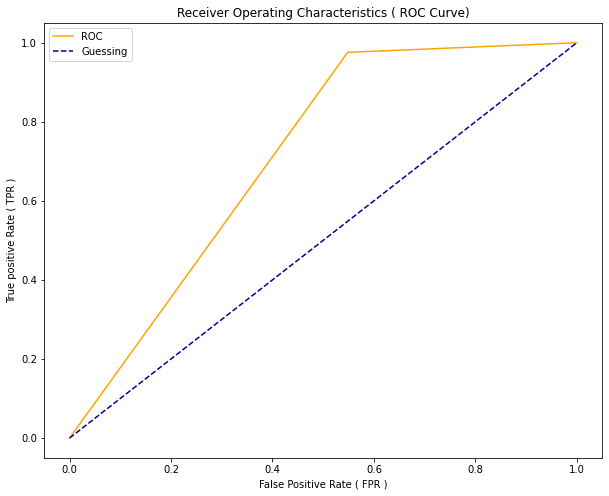

AUC Score : 71.36%


In [131]:
FPR,TPR,Threshold=roc_curve(y_test,ypred_n_b)
AUC=roc_curve(y_test,ypred_n_b)
def Plot_ROC_Curve(FPR,TPR) :
    plt.figure(figsize = (10, 8))
    # Plot ROC Curve
    plt.plot(FPR, TPR,color ='orange', label = 'ROC')
    # Plot Line with No Predictive Power (Baseline)
    plt.plot([0,1],[0,1], color = 'darkblue', linestyle = '--', label = 'Guessing')
    # Customize the Plot 
    plt.title('Receiver Operating Characteristics ( ROC Curve)')
    plt.xlabel('False Positive Rate ( FPR )')
    plt.ylabel('True positive Rate ( TPR )')
    plt.legend()
    plt.show()
Plot_ROC_Curve(FPR, TPR)
print(f'AUC Score : {roc_auc_score(y_test, ypred_n_b)*100:.2f}%')

In [132]:
nb.get_params(deep=True)

{'priors': None, 'var_smoothing': 1}

### NB Hyperparameter Tuning

In [133]:
nb_classifier = GaussianNB()
params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}
nb_c = GridSearchCV(estimator=nb_classifier, 
                     param_grid=params_NB, 
                     cv=3,
                     verbose=1, 
                     scoring='accuracy')

nb_c.fit(X_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.6s finished


GridSearchCV(cv=3, estimator=GaussianNB(),
             param_grid={'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.57933225e-02, 5.33669923e-02, 4.32876128e-02,
       3.51119173e-02, 2.84803587e-02, 2.31...
       1.23284674e-07, 1.00000000e-07, 8.11130831e-08, 6.57933225e-08,
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])},
             scoring='accuracy', verbose=1)

In [134]:
nb_c.best_params_

{'var_smoothing': 1.0}

In [135]:
ypred_nb=nb_c.predict(X_test)
print('Accuracy:',metrics.accuracy_score(y_test,ypred_nb)*100)

Accuracy: 80.0


In [136]:
cm=confusion_matrix(y_test,ypred_nb)
print(cm)

[[ 28  34]
 [  3 120]]


Text(33.0, 0.5, 'Actual')

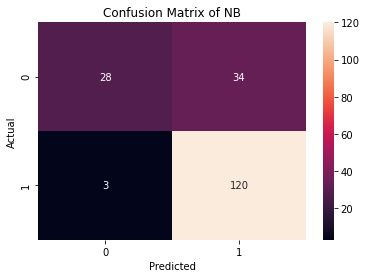

In [137]:
ConfusionMatrix=confusion_matrix(y_test,ypred_nb)
sns.heatmap(ConfusionMatrix,annot = True, fmt = "d")
plt.title('Confusion Matrix of NB')
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [138]:
print(classification_report(y_test,ypred_nb))

              precision    recall  f1-score   support

           0       0.90      0.45      0.60        62
           1       0.78      0.98      0.87       123

    accuracy                           0.80       185
   macro avg       0.84      0.71      0.73       185
weighted avg       0.82      0.80      0.78       185



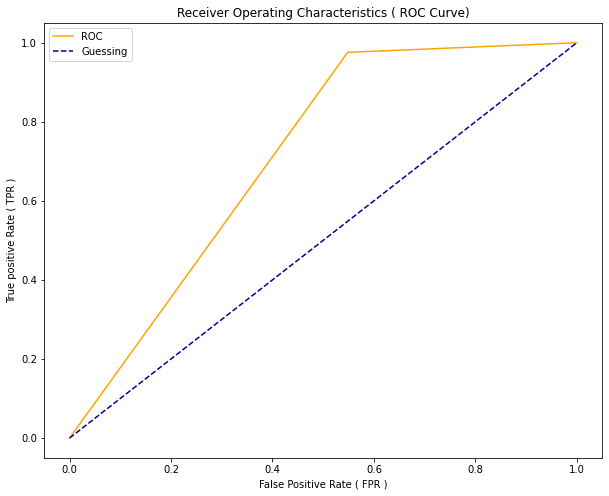

AUC Score : 71.36%


In [139]:
FPR,TPR,Threshold=roc_curve(y_test,ypred_nb)
AUC=roc_curve(y_test,ypred_nb)
def Plot_ROC_Curve(FPR,TPR) :
    plt.figure(figsize = (10, 8))
    # Plot ROC Curve
    plt.plot(FPR, TPR,color ='orange', label = 'ROC')
    # Plot Line with No Predictive Power (Baseline)
    plt.plot([0,1],[0,1], color = 'darkblue', linestyle = '--', label = 'Guessing')
    # Customize the Plot 
    plt.title('Receiver Operating Characteristics ( ROC Curve)')
    plt.xlabel('False Positive Rate ( FPR )')
    plt.ylabel('True positive Rate ( TPR )')
    plt.legend()
    plt.show()
Plot_ROC_Curve(FPR, TPR)
print(f'AUC Score : {roc_auc_score(y_test, ypred_nb)*100:.2f}%')

### Clustering Algorithms

### Hierarchical Clustering

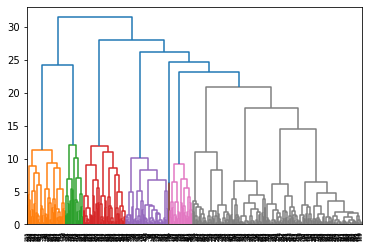

In [140]:
hc_w=sch.dendrogram(sch.linkage(X_train,method='ward'))
plt.show()

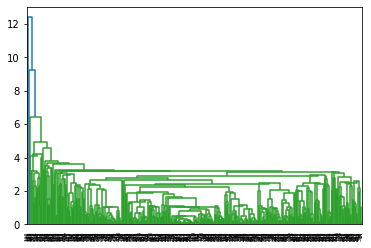

In [141]:
hc_c=sch.dendrogram(sch.linkage(X_train,method='centroid'))
plt.show()

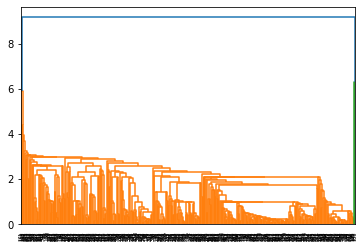

In [142]:
hc_s=sch.dendrogram(sch.linkage(X_train,method='single'))
plt.show()

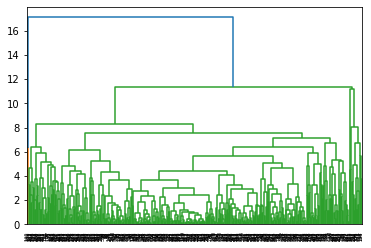

In [143]:
hc_co=sch.dendrogram(sch.linkage(X_train,method='complete'))
plt.show()

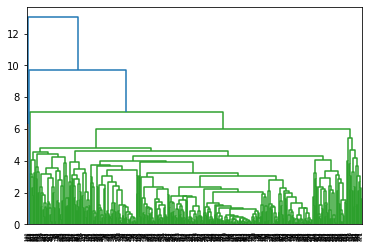

In [144]:
hc_a=sch.dendrogram(sch.linkage(X_train,method='average'))
plt.show()

### Agglomerative Clustering

In [145]:
acs=AgglomerativeClustering(n_clusters=5,affinity='manhattan',linkage='single')
ypred_acs=acs.fit_predict(X_train)
ypred_acs

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [146]:
acc=AgglomerativeClustering(n_clusters=5,affinity='euclidean',linkage='complete')
ypred_acc=acs.fit_predict(X_train)
ypred_acc

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

### KMeans

In [147]:
k=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=0)
    kmeans.fit(X)
    k.append(kmeans.inertia_)
k

[28133349854.697296,
 14330385550.641867,
 9335872334.059628,
 6346837991.421665,
 4912365177.37881,
 3660321629.2406597,
 2820160535.9318404,
 2383082244.466054,
 1956874150.1738992,
 1659458388.0651267]

Text(0.5, 1.0, 'The Elbow Method')

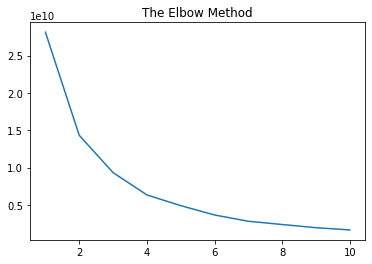

In [148]:
plt.plot(range(1,11),k)
plt.title('The Elbow Method')

From n_clusters=4, we will get optimal clusters. As from k=4, curve is increasing.

In [149]:
kmeans=KMeans(n_clusters=4,init='k-means++',random_state=0)
kmeans.fit(X)

KMeans(n_clusters=4, random_state=0)

### Boosting Algorithms

### AdaBoost

In [150]:
ab= AdaBoostClassifier(DecisionTreeClassifier(criterion='entropy',max_depth=1),n_estimators=200,learning_rate=1)
ab.fit(X_train,y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy',
                                                         max_depth=1),
                   learning_rate=1, n_estimators=200)

In [151]:
ypred_ab=ab.predict(X_test)
ypred_ab

array([1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1])

In [152]:
print('Accuracy:', metrics.accuracy_score(y_test,ypred_ab)*100)

Accuracy: 75.13513513513513


In [153]:
print(confusion_matrix(y_test, ypred_ab))

[[ 32  30]
 [ 16 107]]


Text(33.0, 0.5, 'Actual')

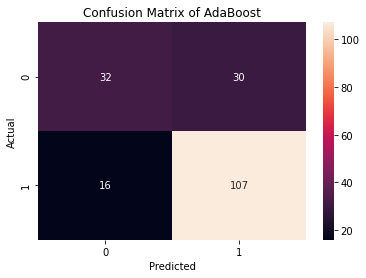

In [154]:
ConfusionMatrix=confusion_matrix(y_test,ypred_ab)
sns.heatmap(ConfusionMatrix,annot = True, fmt = "d")
plt.title('Confusion Matrix of AdaBoost')
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [155]:
print(classification_report(y_test,ypred_ab))

              precision    recall  f1-score   support

           0       0.67      0.52      0.58        62
           1       0.78      0.87      0.82       123

    accuracy                           0.75       185
   macro avg       0.72      0.69      0.70       185
weighted avg       0.74      0.75      0.74       185



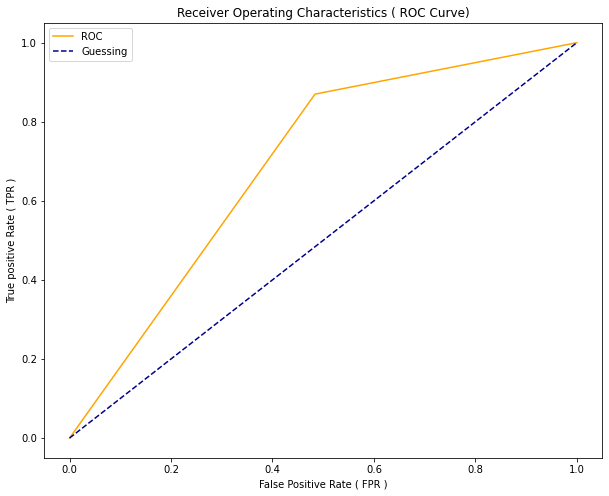

AUC Score : 69.30%


In [156]:
FPR,TPR,Threshold=roc_curve(y_test,ypred_ab)
AUC=roc_curve(y_test,ypred_ab)
def Plot_ROC_Curve(FPR,TPR) :
    plt.figure(figsize = (10, 8))
    # Plot ROC Curve
    plt.plot(FPR, TPR,color ='orange', label = 'ROC')
    # Plot Line with No Predictive Power (Baseline)
    plt.plot([0,1],[0,1], color = 'darkblue', linestyle = '--', label = 'Guessing')
    # Customize the Plot 
    plt.title('Receiver Operating Characteristics ( ROC Curve)')
    plt.xlabel('False Positive Rate ( FPR )')
    plt.ylabel('True positive Rate ( TPR )')
    plt.legend()
    plt.show()
Plot_ROC_Curve(FPR, TPR)
print(f'AUC Score : {roc_auc_score(y_test, ypred_ab)*100:.2f}%')

### AdaBoost Hyperparameter Tuning

In [157]:
param_grid = {"base_estimator__criterion" : ["gini", "entropy"],
              "base_estimator__splitter" :   ["best", "random"],
              "n_estimators": [1, 2]
             }

In [158]:
dt=DecisionTreeClassifier(random_state = 11, max_features = "auto",max_depth = 1)
abc=GridSearchCV(AdaBoostClassifier(base_estimator = dt), param_grid=param_grid, scoring = 'accuracy')

In [159]:
abc.fit(X_train,y_train)

GridSearchCV(estimator=AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1,
                                                                                max_features='auto',
                                                                                random_state=11)),
             param_grid={'base_estimator__criterion': ['gini', 'entropy'],
                         'base_estimator__splitter': ['best', 'random'],
                         'n_estimators': [1, 2]},
             scoring='accuracy')

In [160]:
abc.best_params_

{'base_estimator__criterion': 'entropy',
 'base_estimator__splitter': 'best',
 'n_estimators': 2}

In [161]:
ypred_abc=abc.predict(X_test)
ypred_abc

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1])

In [162]:
print('Accuracy:',metrics.accuracy_score(y_test,ypred_abc)*100)

Accuracy: 66.48648648648648


In [163]:
print(confusion_matrix(y_test, ypred_abc))

[[  0  62]
 [  0 123]]


Text(33.0, 0.5, 'Actual')

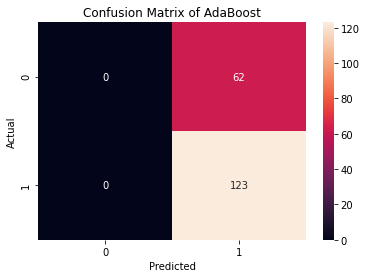

In [164]:
ConfusionMatrix=confusion_matrix(y_test,ypred_abc)
sns.heatmap(ConfusionMatrix,annot = True, fmt = "d")
plt.title('Confusion Matrix of AdaBoost')
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [165]:
print(classification_report(y_test,ypred_abc))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        62
           1       0.66      1.00      0.80       123

    accuracy                           0.66       185
   macro avg       0.33      0.50      0.40       185
weighted avg       0.44      0.66      0.53       185



C:\Users\sreer\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


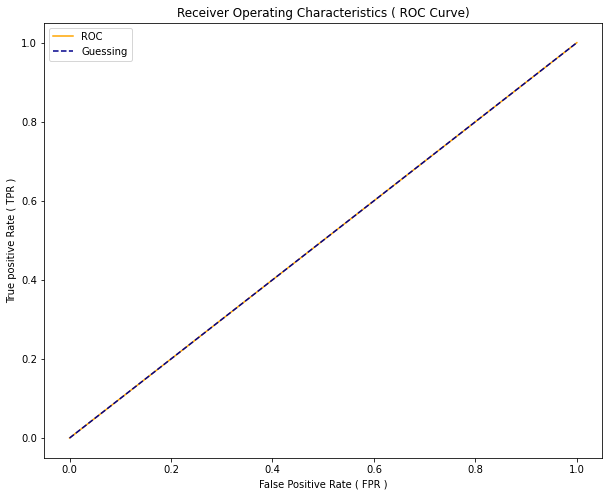

AUC Score : 50.00%


In [166]:
FPR,TPR,Threshold=roc_curve(y_test,ypred_abc)
AUC=roc_curve(y_test,ypred_abc)
def Plot_ROC_Curve(FPR,TPR) :
    plt.figure(figsize = (10, 8))
    # Plot ROC Curve
    plt.plot(FPR, TPR,color ='orange', label = 'ROC')
    # Plot Line with No Predictive Power (Baseline)
    plt.plot([0,1],[0,1], color = 'darkblue', linestyle = '--', label = 'Guessing')
    # Customize the Plot 
    plt.title('Receiver Operating Characteristics ( ROC Curve)')
    plt.xlabel('False Positive Rate ( FPR )')
    plt.ylabel('True positive Rate ( TPR )')
    plt.legend()
    plt.show()
Plot_ROC_Curve(FPR, TPR)
print(f'AUC Score : {roc_auc_score(y_test, ypred_abc)*100:.2f}%')

### XG Boost

In [167]:
from xgboost.sklearn import XGBClassifier
xgboost = XGBClassifier(max_depth=2,n_estimators=100,learning_rate=0.01)
xgboost.fit(X_train,y_train)

ModuleNotFoundError: No module named 'xgboost'

In [ ]:
ypred_xg=xgboost.predict(X_test)
ypred_xg

In [ ]:
print('Accuracy:', metrics.accuracy_score(y_test,ypred_xg)*100)

In [ ]:
print(confusion_matrix(y_test, ypred_xg))

In [ ]:
ConfusionMatrix=confusion_matrix(y_test,ypred_xg)
sns.heatmap(ConfusionMatrix,annot = True, fmt = "d")
plt.title('Confusion Matrix of XGBoost')
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [ ]:
print(classification_report(y_test,ypred_xg))

In [ ]:
FPR,TPR,Threshold=roc_curve(y_test,ypred_xg)
AUC=roc_curve(y_test,ypred_xg)
def Plot_ROC_Curve(FPR,TPR) :
    plt.figure(figsize = (10, 8))
    # Plot ROC Curve
    plt.plot(FPR, TPR,color ='orange', label = 'ROC')
    # Plot Line with No Predictive Power (Baseline)
    plt.plot([0,1],[0,1], color = 'darkblue', linestyle = '--', label = 'Guessing')
    # Customize the Plot 
    plt.title('Receiver Operating Characteristics ( ROC Curve)')
    plt.xlabel('False Positive Rate ( FPR )')
    plt.ylabel('True positive Rate ( TPR )')
    plt.legend()
    plt.show()
Plot_ROC_Curve(FPR, TPR)
print(f'AUC Score : {roc_auc_score(y_test, ypred_xg)*100:.2f}%')

### Gradient Boosting

In [168]:
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)

GradientBoostingClassifier()

In [169]:
ypred_gb=gb.predict(X_test)
ypred_gb

array([1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1])

In [170]:
print('Accuracy:', metrics.accuracy_score(y_test,ypred_gb)*100)

Accuracy: 78.37837837837837


In [171]:
print(confusion_matrix(y_test, ypred_gb))

[[ 31  31]
 [  9 114]]


Text(33.0, 0.5, 'Actual')

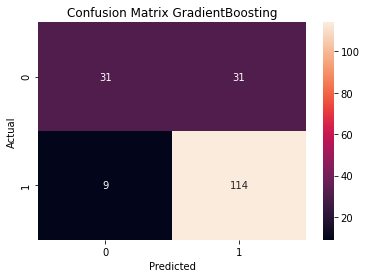

In [172]:
ConfusionMatrix=confusion_matrix(y_test,ypred_gb)
sns.heatmap(ConfusionMatrix,annot = True, fmt = "d")
plt.title('Confusion Matrix GradientBoosting')
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [173]:
print(classification_report(y_test,ypred_gb))

              precision    recall  f1-score   support

           0       0.78      0.50      0.61        62
           1       0.79      0.93      0.85       123

    accuracy                           0.78       185
   macro avg       0.78      0.71      0.73       185
weighted avg       0.78      0.78      0.77       185



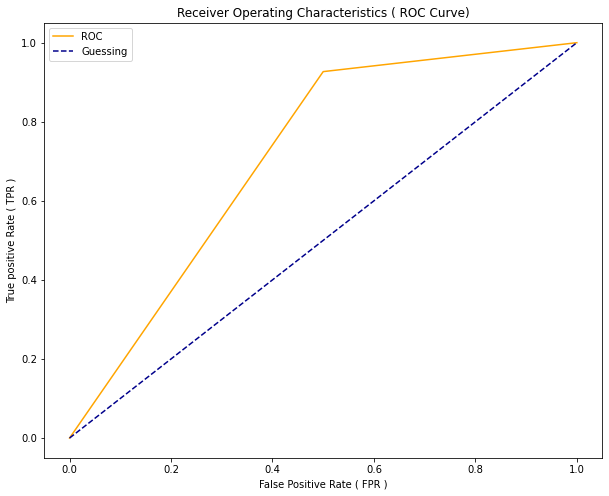

AUC Score : 71.34%


In [174]:
FPR,TPR,Threshold=roc_curve(y_test,ypred_gb)
AUC=roc_curve(y_test,ypred_gb)
def Plot_ROC_Curve(FPR,TPR) :
    plt.figure(figsize = (10, 8))
    # Plot ROC Curve
    plt.plot(FPR, TPR,color ='orange', label = 'ROC')
    # Plot Line with No Predictive Power (Baseline)
    plt.plot([0,1],[0,1], color = 'darkblue', linestyle = '--', label = 'Guessing')
    # Customize the Plot 
    plt.title('Receiver Operating Characteristics ( ROC Curve)')
    plt.xlabel('False Positive Rate ( FPR )')
    plt.ylabel('True positive Rate ( TPR )')
    plt.legend()
    plt.show()
Plot_ROC_Curve(FPR, TPR)
print(f'AUC Score : {roc_auc_score(y_test, ypred_gb)*100:.2f}%')

### PCA

In [175]:
pca=PCA(n_components=2)
X_train=pca.fit_transform(X_train)
x_test=pca.transform(X_test)
pca.explained_variance_ratio_

array([0.18791149, 0.15923083])